## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.211597 -0.206839  0.602548  1.574797 -0.502189  1.343046
1  0.917192 -0.275109 -1.133542 -1.859553  1.442299  0.296989
2  1.302778 -0.571369 -0.108729  0.195545  0.163586  0.410138
3  0.826059  1.310132 -0.980812 -1.713548  1.127030  0.225030
4  0.355102  1.559288  0.412959  0.533174 -0.222700  0.806416


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0370353	total: 68.7ms	remaining: 1m 8s
1:	learn: 1.0286039	total: 69.2ms	remaining: 34.5s
2:	learn: 1.0173731	total: 69.7ms	remaining: 23.2s
3:	learn: 1.0062609	total: 70.3ms	remaining: 17.5s
4:	learn: 0.9963067	total: 70.8ms	remaining: 14.1s
5:	learn: 0.9861992	total: 71.3ms	remaining: 11.8s
6:	learn: 0.9757870	total: 71.7ms	remaining: 10.2s
7:	learn: 0.9665090	total: 72.3ms	remaining: 8.96s
8:	learn: 0.9580507	total: 72.7ms	remaining: 8s
9:	learn: 0.9485851	total: 73.2ms	remaining: 7.25s
10:	learn: 0.9386221	total: 73.7ms	remaining: 6.63s
11:	learn: 0.9277417	total: 74.1ms	remaining: 6.1s
12:	learn: 0.9198478	total: 74.5ms	remaining: 5.66s
13:	learn: 0.9123344	total: 75.3ms	remaining: 5.3s
14:	learn: 0.9045468	total: 75.7ms	remaining: 4.97s
15:	learn: 0.8969713	total: 76.1ms	remaining: 4.68s
16:	learn: 0.8885160	total: 76.5ms	remaining: 4.43s
17:	learn: 0.8806627	total: 77ms	remaining: 4.2s
18:	learn: 0.8717149	total: 77.5ms	remaining: 4s
19:

89:	learn: 0.4493561	total: 108ms	remaining: 1.09s
90:	learn: 0.4452473	total: 108ms	remaining: 1.08s
91:	learn: 0.4410664	total: 109ms	remaining: 1.07s
92:	learn: 0.4372607	total: 109ms	remaining: 1.06s
93:	learn: 0.4335264	total: 110ms	remaining: 1.05s
94:	learn: 0.4295127	total: 110ms	remaining: 1.05s
95:	learn: 0.4248727	total: 110ms	remaining: 1.04s
96:	learn: 0.4213918	total: 111ms	remaining: 1.03s
97:	learn: 0.4177940	total: 111ms	remaining: 1.02s
98:	learn: 0.4139827	total: 112ms	remaining: 1.02s
99:	learn: 0.4111542	total: 112ms	remaining: 1.01s
100:	learn: 0.4073652	total: 112ms	remaining: 1s
101:	learn: 0.4037290	total: 113ms	remaining: 994ms
102:	learn: 0.4006035	total: 113ms	remaining: 988ms
103:	learn: 0.3974948	total: 114ms	remaining: 980ms
104:	learn: 0.3941840	total: 114ms	remaining: 974ms
105:	learn: 0.3911638	total: 115ms	remaining: 967ms
106:	learn: 0.3875352	total: 115ms	remaining: 960ms
107:	learn: 0.3843661	total: 116ms	remaining: 955ms
108:	learn: 0.3807575	tota

264:	learn: 0.1234102	total: 187ms	remaining: 517ms
265:	learn: 0.1227645	total: 187ms	remaining: 516ms
266:	learn: 0.1220893	total: 188ms	remaining: 515ms
267:	learn: 0.1216704	total: 188ms	remaining: 514ms
268:	learn: 0.1210493	total: 189ms	remaining: 512ms
269:	learn: 0.1202582	total: 189ms	remaining: 511ms
270:	learn: 0.1197005	total: 189ms	remaining: 510ms
271:	learn: 0.1189480	total: 190ms	remaining: 508ms
272:	learn: 0.1182228	total: 190ms	remaining: 507ms
273:	learn: 0.1177634	total: 191ms	remaining: 505ms
274:	learn: 0.1171357	total: 191ms	remaining: 504ms
275:	learn: 0.1165610	total: 192ms	remaining: 503ms
276:	learn: 0.1158396	total: 192ms	remaining: 502ms
277:	learn: 0.1152400	total: 193ms	remaining: 501ms
278:	learn: 0.1143341	total: 193ms	remaining: 499ms
279:	learn: 0.1139195	total: 194ms	remaining: 498ms
280:	learn: 0.1132245	total: 194ms	remaining: 497ms
281:	learn: 0.1126966	total: 195ms	remaining: 495ms
282:	learn: 0.1123672	total: 195ms	remaining: 495ms
283:	learn: 

487:	learn: 0.0435782	total: 291ms	remaining: 305ms
488:	learn: 0.0432979	total: 291ms	remaining: 304ms
489:	learn: 0.0430896	total: 292ms	remaining: 304ms
490:	learn: 0.0428603	total: 292ms	remaining: 303ms
491:	learn: 0.0428120	total: 293ms	remaining: 302ms
492:	learn: 0.0426028	total: 293ms	remaining: 301ms
493:	learn: 0.0423368	total: 294ms	remaining: 301ms
494:	learn: 0.0422894	total: 294ms	remaining: 300ms
495:	learn: 0.0420526	total: 295ms	remaining: 299ms
496:	learn: 0.0418794	total: 295ms	remaining: 299ms
497:	learn: 0.0418328	total: 295ms	remaining: 298ms
498:	learn: 0.0416162	total: 296ms	remaining: 297ms
499:	learn: 0.0415702	total: 296ms	remaining: 296ms
500:	learn: 0.0414022	total: 297ms	remaining: 296ms
501:	learn: 0.0413568	total: 297ms	remaining: 295ms
502:	learn: 0.0411900	total: 298ms	remaining: 294ms
503:	learn: 0.0409815	total: 298ms	remaining: 294ms
504:	learn: 0.0409366	total: 299ms	remaining: 293ms
505:	learn: 0.0407747	total: 299ms	remaining: 292ms
506:	learn: 

651:	learn: 0.0246576	total: 369ms	remaining: 197ms
652:	learn: 0.0245470	total: 370ms	remaining: 197ms
653:	learn: 0.0244786	total: 370ms	remaining: 196ms
654:	learn: 0.0243296	total: 371ms	remaining: 195ms
655:	learn: 0.0242821	total: 372ms	remaining: 195ms
656:	learn: 0.0241744	total: 372ms	remaining: 194ms
657:	learn: 0.0241081	total: 372ms	remaining: 194ms
658:	learn: 0.0239791	total: 373ms	remaining: 193ms
659:	learn: 0.0238799	total: 374ms	remaining: 192ms
660:	learn: 0.0238221	total: 374ms	remaining: 192ms
661:	learn: 0.0236959	total: 375ms	remaining: 191ms
662:	learn: 0.0236393	total: 375ms	remaining: 191ms
663:	learn: 0.0235426	total: 376ms	remaining: 190ms
664:	learn: 0.0234041	total: 376ms	remaining: 189ms
665:	learn: 0.0233530	total: 377ms	remaining: 189ms
666:	learn: 0.0233030	total: 377ms	remaining: 188ms
667:	learn: 0.0231817	total: 378ms	remaining: 188ms
668:	learn: 0.0230879	total: 378ms	remaining: 187ms
669:	learn: 0.0230346	total: 378ms	remaining: 186ms
670:	learn: 

864:	learn: 0.0115450	total: 474ms	remaining: 74ms
865:	learn: 0.0114956	total: 475ms	remaining: 73.5ms
866:	learn: 0.0114496	total: 475ms	remaining: 72.9ms
867:	learn: 0.0114043	total: 476ms	remaining: 72.4ms
868:	learn: 0.0113582	total: 476ms	remaining: 71.8ms
869:	learn: 0.0113016	total: 477ms	remaining: 71.3ms
870:	learn: 0.0112858	total: 478ms	remaining: 70.7ms
871:	learn: 0.0112629	total: 478ms	remaining: 70.2ms
872:	learn: 0.0112474	total: 479ms	remaining: 69.6ms
873:	learn: 0.0112321	total: 479ms	remaining: 69.1ms
874:	learn: 0.0111840	total: 479ms	remaining: 68.5ms
875:	learn: 0.0111338	total: 480ms	remaining: 67.9ms
876:	learn: 0.0111115	total: 480ms	remaining: 67.4ms
877:	learn: 0.0110895	total: 481ms	remaining: 66.8ms
878:	learn: 0.0110237	total: 482ms	remaining: 66.3ms
879:	learn: 0.0110103	total: 482ms	remaining: 65.7ms
880:	learn: 0.0109458	total: 482ms	remaining: 65.2ms
881:	learn: 0.0109325	total: 483ms	remaining: 64.6ms
882:	learn: 0.0108866	total: 483ms	remaining: 64

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

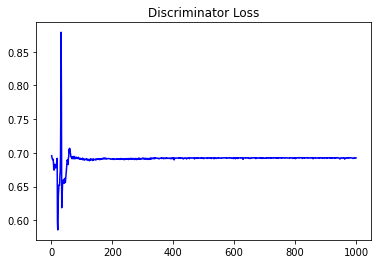

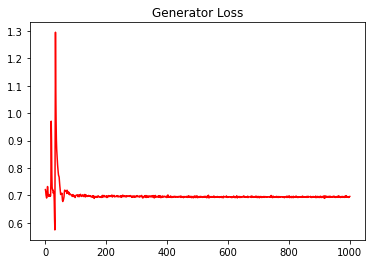

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10215857090411684


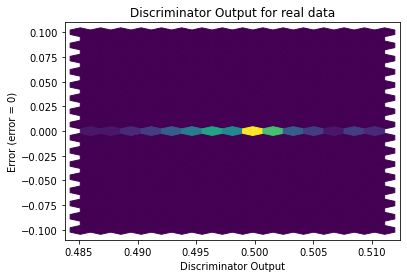

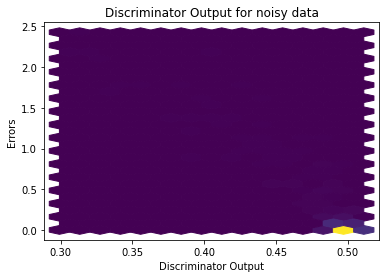

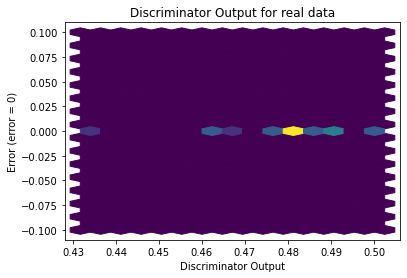

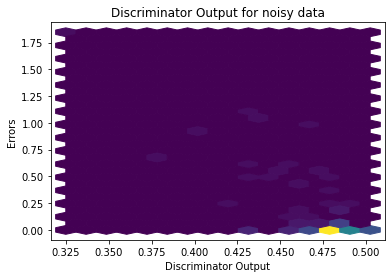

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


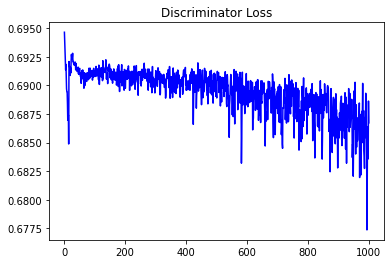

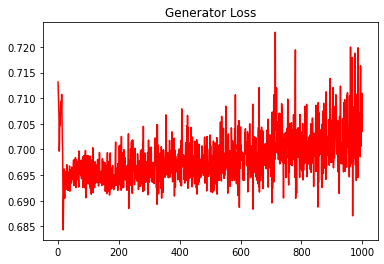

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.058261915793028474


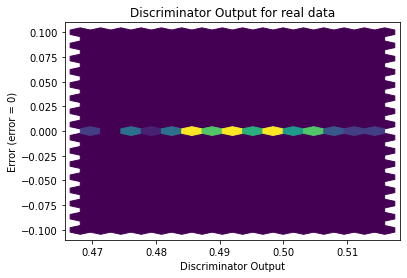

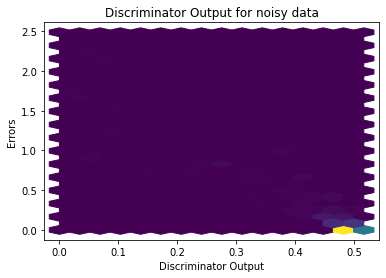

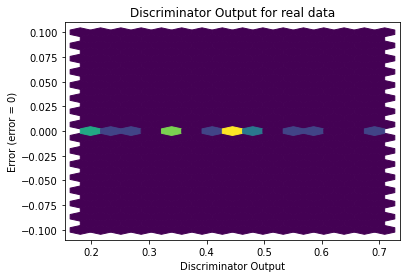

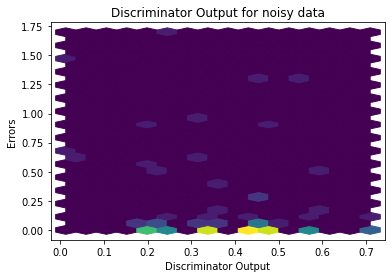

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1064]], requires_grad=True)
